In [ ]:
# !pip install snowflake-connector-python

In [3]:
# !pip install wordcloud

In [21]:
import pandas as pd
import snowflake.connector
import os
from datetime import datetime
from dotenv import load_dotenv
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# 1.1 Load Snowflake credentials for temp user

In [4]:
# Load environment variables from a .env file
load_dotenv()

try:
    TEMP_USER = os.getenv('SNOWSQL_TEMP_USER')
    TEMP_USER_PASSWORD = os.getenv('SNOWSQL_TEMP_PWD')
    
    if not TEMP_USER:
        raise ValueError("Environment variable SNOWSQL_TEMP_USER must be set")
    if not TEMP_USER_PASSWORD:
        raise ValueError("Environment variable SNOWSQL_TEMP_PWD must be set")

except ValueError as ve:
    print(f"Error: {ve}")
    
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# 1.2 Connect to Snowflake

In [5]:
# Establish connection to Snowflake
current_time = datetime.now().strftime('%Y-%m-%d %H:%M%S')

try:
    conn = snowflake.connector.connect(
        user=TEMP_USER,
        password=TEMP_USER_PASSWORD,
        account='ygeuort-alb19263',
        warehouse='COMPUTE_WH',
        database='AIRBNB',
        schema='ODS'
    )

    print(f'Connected to Snowflake successfully at {current_time}')

except Exception as e:
    print(f'Failed to connect to Snowflake on {current_time} due to error code {e}')

Connected to Snowflake successfully at 2024-07-25 15:1135


# 1.3 Data Preprocessing

In [23]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/alex/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/alex/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alex/nltk_data...


True

In [7]:
stop_words = set(stopwords.words('english'))

In [8]:
lemmatizer = WordNetLemmatizer()

In [17]:
# Text cleaning function
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
        
    return ' '.join(words)

### 1.31 Wordcloud

In [13]:
def wordcloud(df):
    # Generate word cloud for cleaned comments
    text = ' '.join(df['clean_comments'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    return wordcloud

### 1.32 Sentiment Analysis

In [24]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to compute sentiment score
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']


def apply_sentiment_score(df):
    # Apply sentiment analysis to each cleaned comment
    df['sentiment_score'] = df['clean_comments'].apply(get_sentiment_score)

    # Classify sentiment based on score
    df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

In [46]:
los_angeles_df.head(50)

,LISTING_ID,ID,REVIEW_DATE,REVIEWER_ID,COMMENTS,MARKET,clean_comments,sentiment_score,sentiment
0,26808013,635513771,2020-07-06,29437847,Probably the best AirBnB my wife and I have ev...,los-angeles,probably best airbnb wife ever stayed atanywhe...,0.8360,positive
1,26808013,640583553,2020-07-20,57273638,we such a wonderful weekend getaway at your be...,los-angeles,wonderful weekend getaway beautiful home perfe...,0.9690,positive
2,26808013,643440537,2020-07-27,112875466,Perfect Venice experience. Highly recommend th...,los-angeles,perfect venice experience highly recommend place,0.7574,positive
3,26808013,645996880,2020-08-02,107266689,It was a great house in a nice quiet neighborh...,los-angeles,great house nice quiet neighborhood space perf...,0.9300,positive
4,26808013,649164649,2020-08-09,38942770,What a wonderful and comfortable home. We tru...,los-angeles,wonderful comfortable home truly lacked nothin...,0.9903,positive
5,26808013,652920223,2020-08-17,61383514,We absolutely loved our stay at Joel’s home. T...,los-angeles,absolutely loved stay joel home location excel...,0.9755,positive
6,26808013,659975318,2020-09-03,22912081,"Great hosts, great place!",los-angeles,great host great place,0.8481,positive
7,26963039,347045139,2018-11-10,5064873,Great spot. Comfy bed. Spacious bathroom en ...,los-angeles,great spot comfy bed spacious bathroom en suit...,0.9413,positive
8,26501836,492991155,2019-07-21,28476144,Great area close to the beach. Small cozy beac...,los-angeles,great area close beach small cozy beach house ...,0.7906,positive
9,26501836,519543622,2019-08-28,385720,A very special location. To be in LA with a sm...,los-angeles,special location la small town feel walk park ...,0.9217,positive


### 1.33 Sentiment Distribution

In [30]:
def sentiment_distribution(df):
    df['sentiment'].value_counts().plot(kind='bar', figsize=(10, 5), color=['green', 'red', 'blue'])
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sentiment')
    plt.show()

### 1.34 Sentiment Scores Histogram

In [34]:
def sentiment_histogram(df):
    # Plot histogram of sentiment scores
    plt.figure(figsize=(10, 5))
    plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sentiment Scores')
    plt.show()

### 1.35 Trends over Time

In [32]:
def trends_over_time(df):
    # Convert REVIEW_DATE to datetime
    df['REVIEW_DATE'] = pd.to_datetime(df['REVIEW_DATE'])

    # Group by date and sentiment to count occurrences
    sentiment_trend = df.groupby([df['REVIEW_DATE'].dt.date, 'sentiment']).size().unstack().fillna(0)

    # Plot the trends over time
    sentiment_trend.plot(kind='line', figsize=(15, 7))
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.title('Sentiment Trends Over Time')
    plt.show()

# 2. Fetch data from Snowflake

In [10]:
# Function to get data
def fetch_data(query):
    try:
        # Execute the query and fetch the data into a DataFrame
        return(pd.read_sql(query, conn))
    
    except Exception as e:
        print(f"Failed to execute query due to error: {e}")

## 2.1 Albany

In [11]:
# SQL query to collect Albany data from the database
albany_query = '''
SELECT * FROM reviews
WHERE market = 'albany'
'''

albany_df = fetch_data(albany_query)
albany_df.head()

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,LISTING_ID,ID,REVIEW_DATE,REVIEWER_ID,COMMENTS,MARKET
0,1489424,7208791,2013-09-10,5817914,Efrat and Dan were very welcoming and accommod...,albany
1,1489424,8001939,2013-10-12,4786919,"As advertised, a very comfy bed. Restful room,...",albany
2,1489424,8123022,2013-10-16,4786919,Glad to be back for a second time in my cozy r...,albany
3,1489424,8279957,2013-10-23,8362214,"We stayed only for a night, so can not tell mu...",albany
4,1489424,8303182,2013-10-24,9458270,I had a pleasant stay here. The bed was indeed...,albany


In [18]:
albany_df['clean_comments'] = albany_df['COMMENTS'].apply(clean_text)
albany_df[['COMMENTS', 'clean_comments']]

,COMMENTS,clean_comments
0,Efrat and Dan were very welcoming and accommod...,efrat dan welcoming accommodating werent sure ...
1,"As advertised, a very comfy bed. Restful room,...",advertised comfy bed restful room pleasant hos...
2,Glad to be back for a second time in my cozy r...,glad back second time cozy room comfy bed pers...
3,"We stayed only for a night, so can not tell mu...",stayed night tell much area upon quite late ar...
4,I had a pleasant stay here. The bed was indeed...,pleasant stay bed indeed comfortable wish coul...
...,...,...
22544,"Great space, clean and warm, hosts were respon...",great space clean warm host responsive welcoming
22545,Nori was great. This is the second of his prop...,nori great second property stayed always clean...
22546,Loved my brief stay in Robert’s beautiful apar...,loved brief stay robert beautiful apartment lo...
22547,I left after I checked in for 10 mins . The pl...,left checked 10 min place clean bedding terrib...


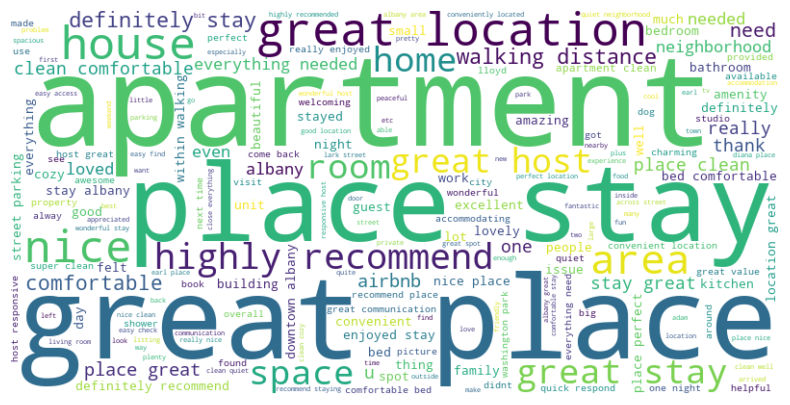

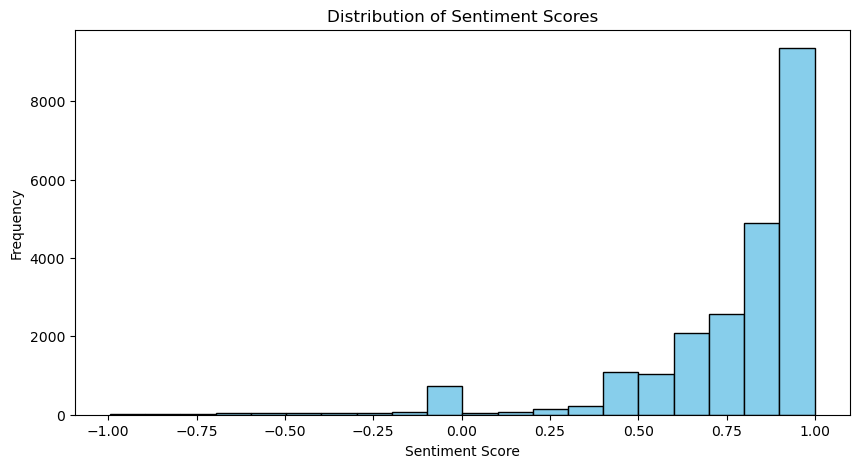

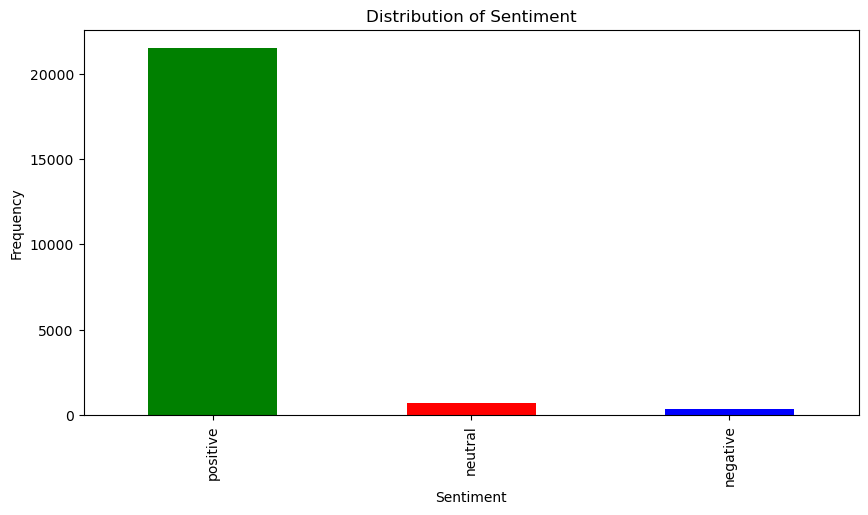

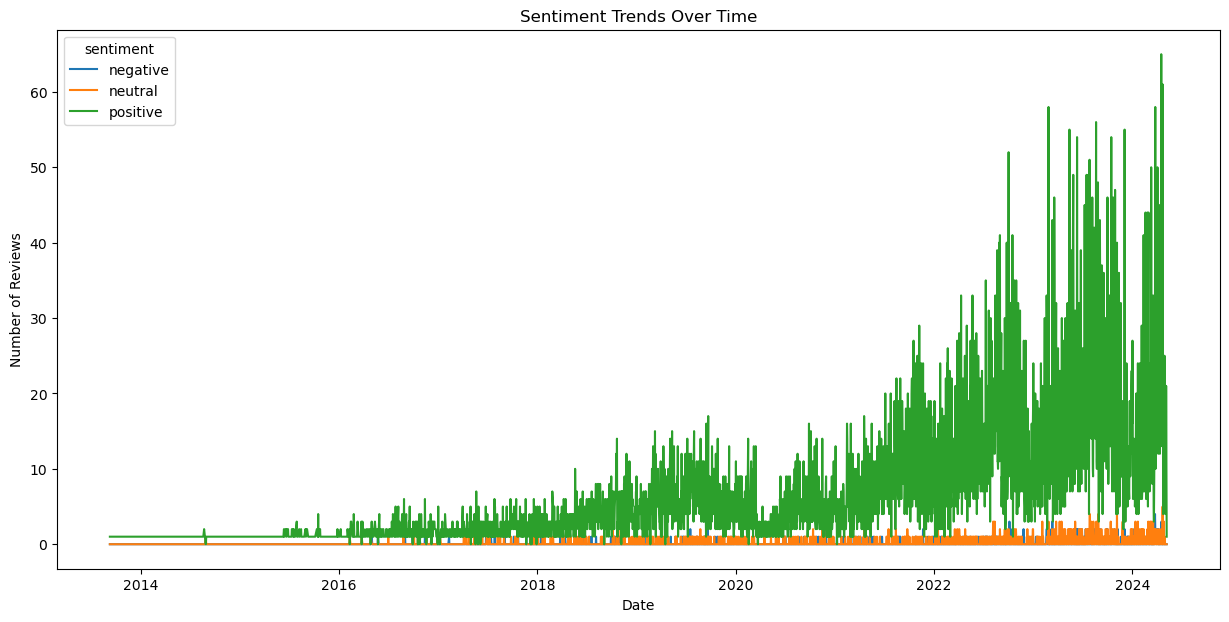

In [38]:
albany_wordcloud = wordcloud(albany_df)

apply_sentiment_score(albany_df)

sentiment_histogram(albany_df)

sentiment_distribution(albany_df)

trends_over_time(albany_df)

## 2.2 Washington DC

In [39]:
# SQL query to collect Washington DC data from the database
washington_dc_query = '''
SELECT * FROM reviews
WHERE market = 'washington-dc'
'''

washington_dc_df = fetch_data(washington_dc_query)
washington_dc_df.head()

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,LISTING_ID,ID,REVIEW_DATE,REVIEWER_ID,COMMENTS,MARKET
0,3686,131293,2010-11-01,257234,Staying with Levita and her wonderful family w...,washington-dc
1,3686,150766,2010-12-08,255888,"Vita is a very welcoming, helpful and friendly...",washington-dc
2,3686,177749,2011-02-02,366688,"This was my first time using ""airbnb"" and it m...",washington-dc
3,3686,197451,2011-03-12,213492,"First, Vita saved my work week by providing me...",washington-dc
4,3686,213212,2011-03-30,428455,Great host! Very welcoming and organised. I st...,washington-dc


In [40]:
washington_dc_df['clean_comments'] = washington_dc_df['COMMENTS'].apply(clean_text)
washington_dc_df[['COMMENTS', 'clean_comments']]

,COMMENTS,clean_comments
0,Staying with Levita and her wonderful family w...,staying levita wonderful family amazing experi...
1,"Vita is a very welcoming, helpful and friendly...",vita welcoming helpful friendly host great coo...
2,"This was my first time using ""airbnb"" and it m...",first time using airbnb made wonder ever staye...
3,"First, Vita saved my work week by providing me...",first vita saved work week providing last minu...
4,Great host! Very welcoming and organised. I st...,great host welcoming organised stayed three ni...
...,...,...
322857,My stay here was fantastic! Roman was a great...,stay fantastic roman great host accommodated g...
322858,We really enjoyed the location and this super ...,really enjoyed location super new modern place...
322859,Very cute place! Roman had the place fully sto...,cute place roman place fully stocked literally...
322860,This was an amazing stay Romans home was lovel...,amazing stay roman home lovely everything exac...


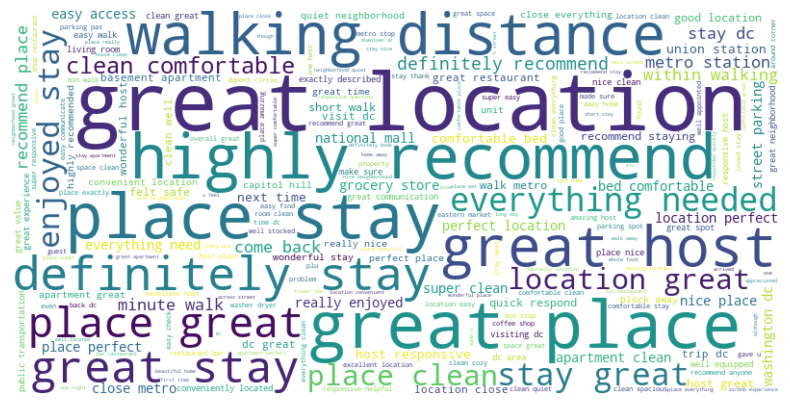

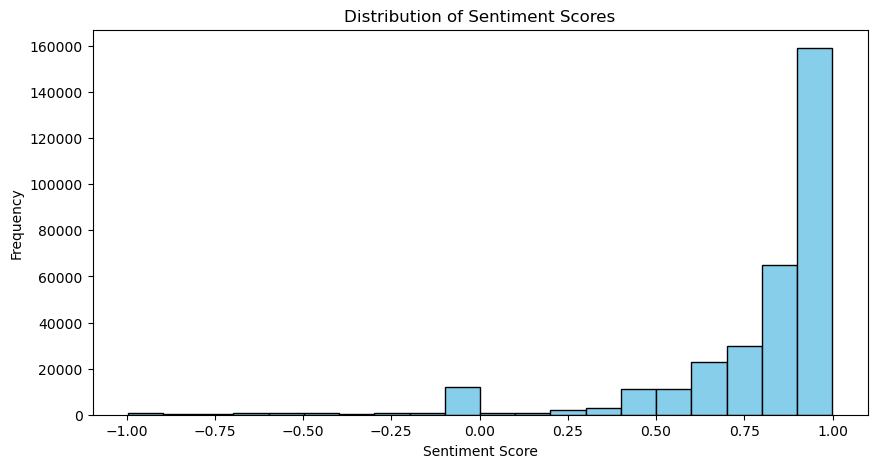

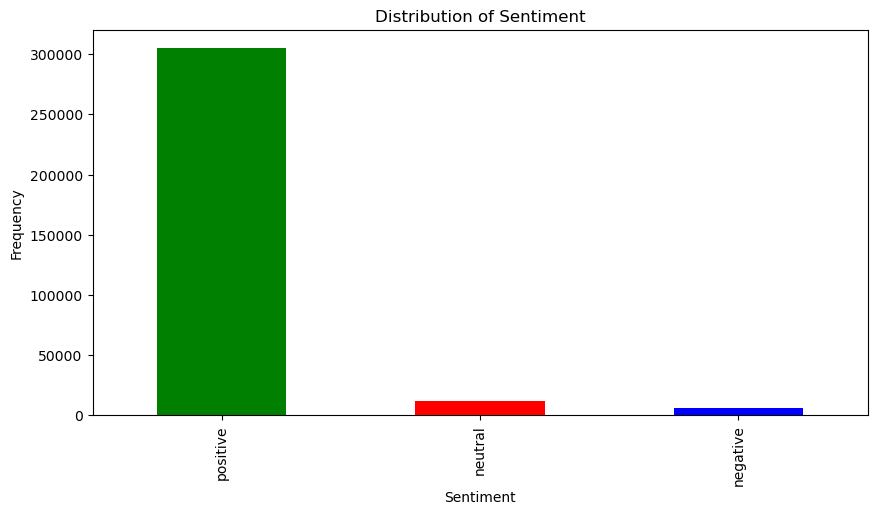

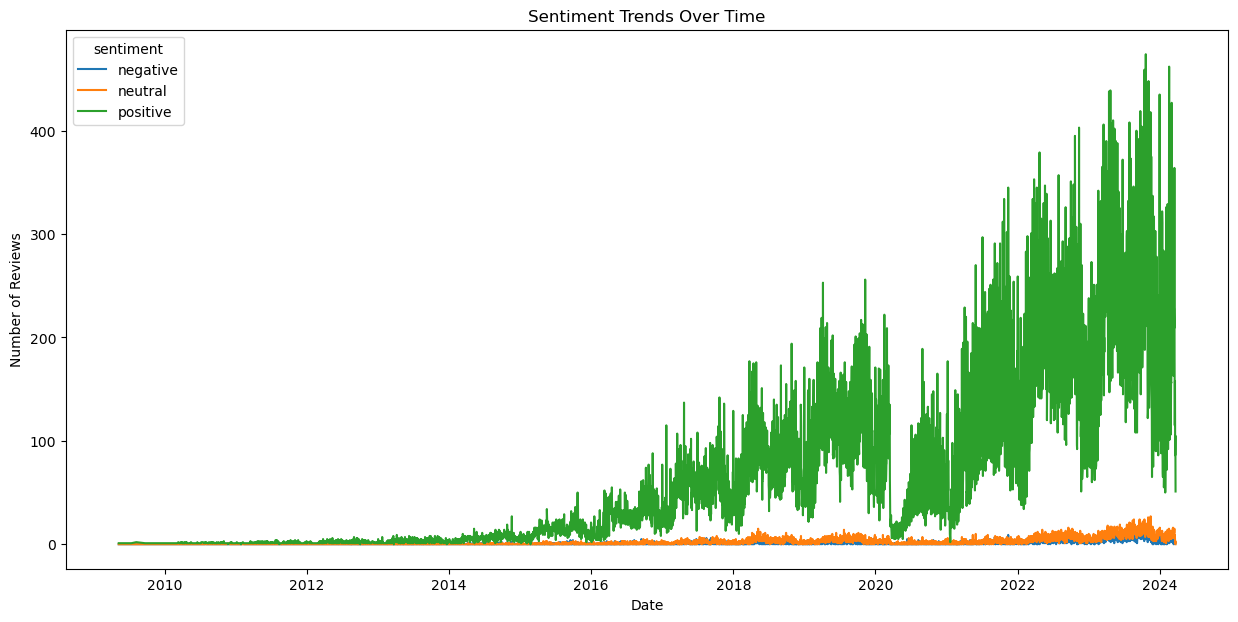

In [41]:
washington_dc_wordcloud = wordcloud(washington_dc_df)

apply_sentiment_score(washington_dc_df)

sentiment_histogram(washington_dc_df)

sentiment_distribution(washington_dc_df)

trends_over_time(washington_dc_df)

## 2.3 Los Angeles

In [42]:
# SQL query to collect Los Angeles data from the database
los_angeles_query = '''
SELECT * FROM reviews
WHERE market = 'los-angeles'
'''

los_angeles_df = fetch_data(los_angeles_query)
los_angeles_df.head()

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,LISTING_ID,ID,REVIEW_DATE,REVIEWER_ID,COMMENTS,MARKET
0,26808013,635513771,2020-07-06,29437847,Probably the best AirBnB my wife and I have ev...,los-angeles
1,26808013,640583553,2020-07-20,57273638,we such a wonderful weekend getaway at your be...,los-angeles
2,26808013,643440537,2020-07-27,112875466,Perfect Venice experience. Highly recommend th...,los-angeles
3,26808013,645996880,2020-08-02,107266689,It was a great house in a nice quiet neighborh...,los-angeles
4,26808013,649164649,2020-08-09,38942770,What a wonderful and comfortable home. We tru...,los-angeles


In [43]:
los_angeles_df['clean_comments'] = los_angeles_df['COMMENTS'].apply(clean_text)
los_angeles_df[['COMMENTS', 'clean_comments']]

,COMMENTS,clean_comments
0,Probably the best AirBnB my wife and I have ev...,probably best airbnb wife ever stayed atanywhe...
1,we such a wonderful weekend getaway at your be...,wonderful weekend getaway beautiful home perfe...
2,Perfect Venice experience. Highly recommend th...,perfect venice experience highly recommend place
3,It was a great house in a nice quiet neighborh...,great house nice quiet neighborhood space perf...
4,What a wonderful and comfortable home. We tru...,wonderful comfortable home truly lacked nothin...
...,...,...
1589336,Beautiful views and stylish space. Host is ver...,beautiful view stylish space host responsive r...
1589337,The description of this place is one of the mo...,description place one accurate ive ever encoun...
1589338,Shannon + Raphael's place is lovely. An easy e...,shannon raphael place lovely easy experience e...
1589339,Beautiful accommodation. Fully equipped kitche...,beautiful accommodation fully equipped kitchen...


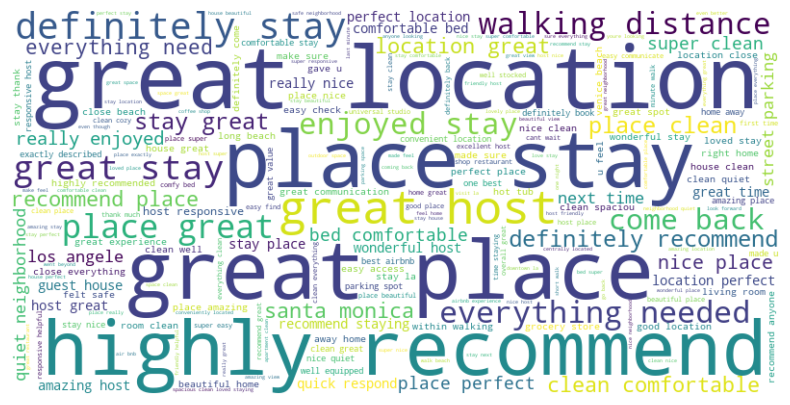

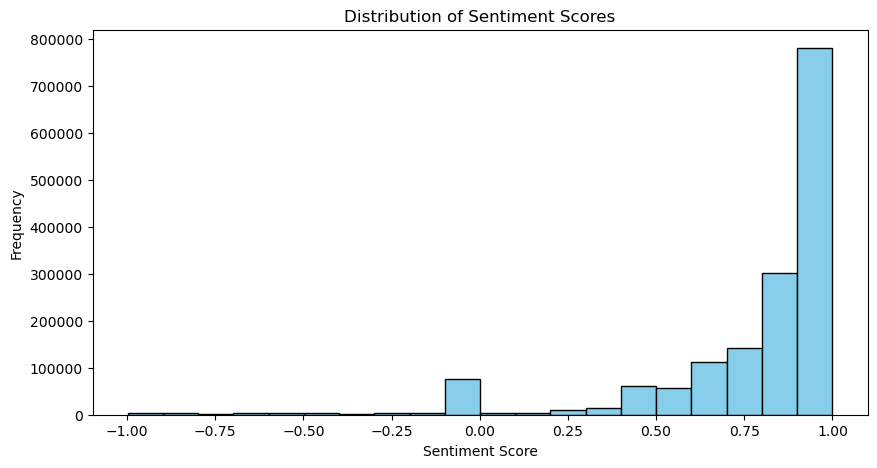

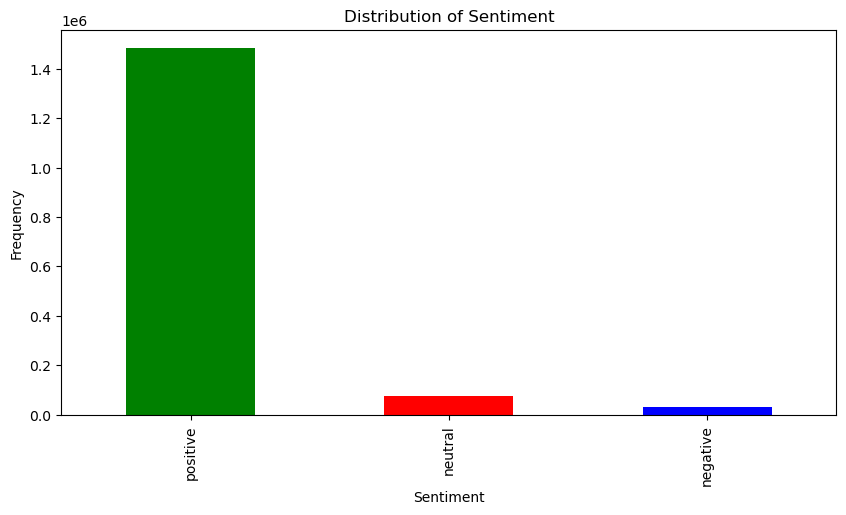

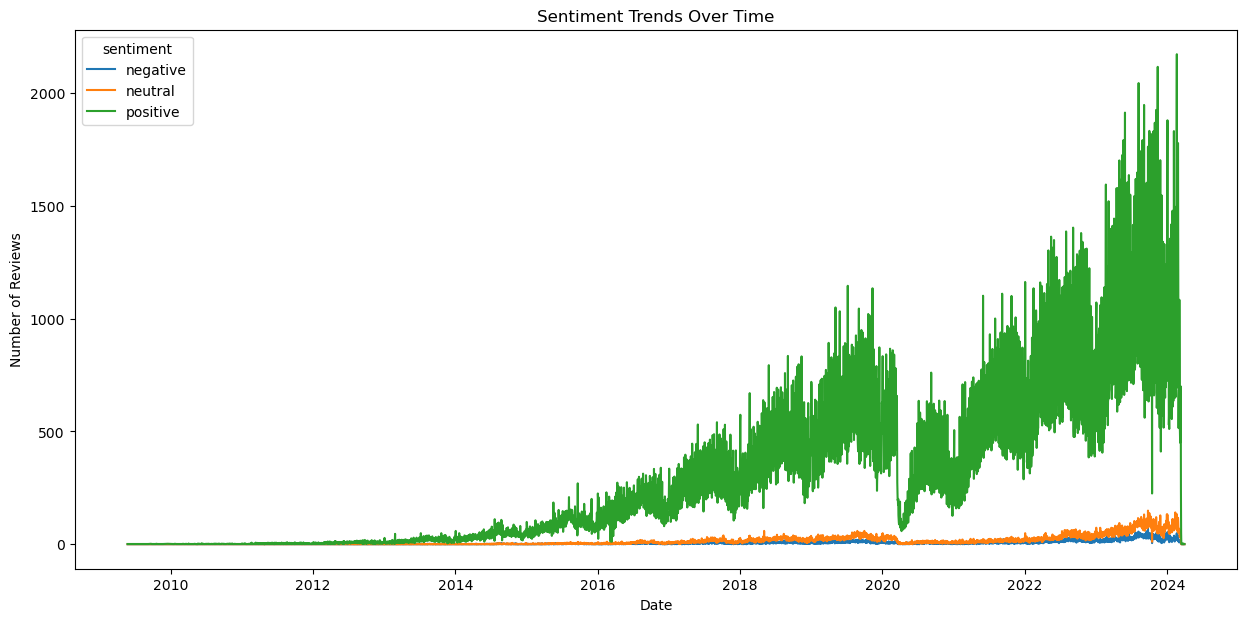

In [44]:
los_angeles_wordcloud = wordcloud(los_angeles_df)

apply_sentiment_score(los_angeles_df)

sentiment_histogram(los_angeles_df)

sentiment_distribution(los_angeles_df)

trends_over_time(los_angeles_df)

### Close connection to database

In [ ]:
conn.close()        
print("Snowflake connection closed.")